In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"references\Subject_info.xlsx")

In [3]:
# Assuming df is your DataFrame
def preprocess_labels(df):
    # Mapping similar categories to a single category
    label_mapping = {
        'EMCI': 'MCI',
        'LMCI': 'MCI',
        'SMC': 'CN'  # If you want SMC to be considered as CN, include this; remove if not
    }
    df['Research Group'] = df['Research Group'].replace(label_mapping)
    return df

preprocess_labels(df)

,Subject,Sex,Weight,Research Group,APOE A1,APOE A2,Age,dataset_split,File_Path,File_Path_desktop,PATH
0,002_S_0295,M,73.0,CN,3.0,4.0,90.0,train,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\002_S_0295_f...,data\processed\002_S_0295_fused.nii
1,002_S_0413,F,57.6,CN,3.0,3.0,81.5,test,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\002_S_0413_f...,data\processed\002_S_0413_fused.nii
2,002_S_0685,F,68.9,CN,3.0,3.0,95.8,test,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\002_S_0685_f...,data\processed\002_S_0685_fused.nii
3,002_S_0729,F,65.8,MCI,3.0,4.0,71.3,validation,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\002_S_0729_f...,data\processed\002_S_0729_fused.nii
4,002_S_1155,M,64.9,MCI,3.0,3.0,64.0,train,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\002_S_1155_f...,data\processed\002_S_1155_fused.nii
...,...,...,...,...,...,...,...,...,...,...,...
173,941_S_4377,F,121.6,MCI,3.0,4.0,69.5,test,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\941_S_4377_f...,data\processed\941_S_4377_fused.nii
174,941_S_4420,M,79.4,MCI,3.0,3.0,81.5,train,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\941_S_4420_f...,data\processed\941_S_4420_fused.nii
175,941_S_4764,F,77.6,MCI,3.0,3.0,82.8,train,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\941_S_4764_f...,data\processed\941_S_4764_fused.nii
176,941_S_5124,F,78.9,CN,3.0,3.0,76.8,test,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\941_S_5124_f...,data\processed\941_S_5124_fused.nii


In [4]:
import pandas as pd

# Assuming df is your DataFrame
df = df[df['Research Group'] != 'AD']


In [5]:
# Initialize an empty DataFrame to hold the balanced data
balanced_df = pd.DataFrame()

# Iterate over each dataset split
for split in df['dataset_split'].unique():
    # Filter the DataFrame for the current split
    split_df = df[df['dataset_split'] == split]
    
    # Find the minimum number of rows for any Research Group within this split
    min_size = split_df['Research Group'].value_counts().min()
    
    # Sample from each group to match the minimum size
    sampled_groups = [group_df.sample(n=min_size, random_state=1) 
                      for name, group_df in split_df.groupby('Research Group')]
    
    # Concatenate the sampled groups into the balanced DataFrame
    balanced_df = pd.concat([balanced_df, *sampled_groups], ignore_index=True)


In [6]:
df = balanced_df
df['Research Group'].value_counts()

Research Group
CN     64
MCI    64
Name: count, dtype: int64

In [7]:
df

,Subject,Sex,Weight,Research Group,APOE A1,APOE A2,Age,dataset_split,File_Path,File_Path_desktop,PATH
0,002_S_1280,F,89.4,CN,3.0,4.0,75.1,train,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\002_S_1280_f...,data\processed\002_S_1280_fused.nii
1,128_S_0863,M,92.1,CN,3.0,3.0,79.3,train,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\128_S_0863_f...,data\processed\128_S_0863_fused.nii
2,002_S_4213,F,80.0,CN,3.0,3.0,78.1,train,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\002_S_4213_f...,data\processed\002_S_4213_fused.nii
3,032_S_5289,F,79.4,CN,3.0,4.0,59.8,train,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\032_S_5289_f...,data\processed\032_S_5289_fused.nii
4,053_S_5296,M,76.0,CN,3.0,3.0,69.3,train,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\053_S_5296_f...,data\processed\053_S_5296_fused.nii
...,...,...,...,...,...,...,...,...,...,...,...
123,002_S_4447,F,68.5,MCI,3.0,4.0,69.7,validation,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\002_S_4447_f...,data\processed\002_S_4447_fused.nii
124,022_S_2167,M,71.4,MCI,3.0,3.0,83.2,validation,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\022_S_2167_f...,data\processed\022_S_2167_fused.nii
125,022_S_4805,F,43.5,MCI,3.0,4.0,72.2,validation,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\022_S_4805_f...,data\processed\022_S_4805_fused.nii
126,002_S_4251,M,78.0,MCI,3.0,3.0,72.0,validation,C:\Users\Micha\OneDrive - Høyskolen Kristiania...,D:\Data\Preprocessed\Fused Images\002_S_4251_f...,data\processed\002_S_4251_fused.nii


In [8]:
# Assuming 'df' is your DataFrame loaded with the 'Research Group' column available
label_categories = pd.Categorical(df['Research Group'])
label_mapping = {code: category for code, category in enumerate(label_categories.categories)}


In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np
import nibabel as nib
import pandas as pd
from torchvision import transforms
from tqdm import tqdm
import os
import datetime

In [10]:
import numpy as np
import nibabel as nib
import torch
from torch.utils.data import Dataset

class NiiDataset(Dataset):
    def __init__(self, df, transform=None):
        """
        Initializes the dataset object.
        :param df: DataFrame containing file paths, labels, and subject IDs.
        :param transform: A function or a series of transforms to apply to the images.
        """
        self.paths = df['PATH'].tolist()  # Paths to .nii files
        self.labels = pd.Categorical(df['Research Group'], categories=pd.Categorical(df['Research Group']).categories).codes
        self.subjects = df['Subject'].tolist()  # Subject identifiers
        self.transform = transform  # Transformation function(s)

    def __len__(self):
        """
        Returns the total number of samples in the dataset.
        """
        return len(self.paths)

    def __getitem__(self, idx):
        path = self.paths[idx]
        image = self.load_nii(path)
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        subject = self.subjects[idx]
        return image, label, path, subject

    def load_nii(self, path):
        """
        Load a NIfTI file and normalize its intensity.
        """
        image = nib.load(path).get_fdata(dtype=np.float32)
        image = self.normalize_intensity(image)
        image = np.expand_dims(image, axis=0)  # Add a channel dimension
        return image

    @staticmethod
    def normalize_intensity(image):
        """
        Normalize the image data to zero mean and unit variance.
        """
        mean_intensity = np.mean(image)
        std_intensity = np.std(image)
        normalized_image = (image - mean_intensity) / std_intensity
        return normalized_image


In [11]:
# Load datasets
def load_datasets(df):
    train_df = df[df['dataset_split'] == 'train']
    val_df = df[df['dataset_split'] == 'validation']
    test_df = df[df['dataset_split'] == 'test']
    
    train_dataset = NiiDataset(train_df)
    val_dataset = NiiDataset(val_df)
    test_dataset = NiiDataset(test_df)
    
    return train_dataset, val_dataset, test_dataset


In [12]:
def create_dataloaders(train_dataset, val_dataset, test_dataset, batch_size=4):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    
    return train_loader, val_loader, test_loader


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VGG3D(nn.Module):
    def __init__(self):
        super(VGG3D, self).__init__()
        # Define 3D convolution blocks with BatchNorm and ReLU activation
        self.conv1 = nn.Sequential(
            nn.Conv3d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm3d(32),
            nn.ReLU(inplace=True)
        )
        self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2, padding=(1, 0, 1))
        
        self.conv2 = nn.Sequential(
            nn.Conv3d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True)
        )
        self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2, padding=(1, 1, 0))

        self.conv3 = nn.Sequential(
            nn.Conv3d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm3d(128),
            nn.ReLU(inplace=True),
            nn.Conv3d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm3d(128),
            nn.ReLU(inplace=True)
        )
        self.pool3 = nn.MaxPool3d(kernel_size=2, stride=2, padding=(1, 0, 1))

        self.conv4 = nn.Sequential(
            nn.Conv3d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(inplace=True),
            nn.Conv3d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(inplace=True)
        )
        self.pool4 = nn.MaxPool3d(kernel_size=2, stride=2, padding=(1, 1, 0))

        self.conv5 = nn.Sequential(
            nn.Conv3d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(inplace=True),
            nn.Conv3d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(inplace=True)
        )
        self.pool5 = nn.MaxPool3d(kernel_size=2, stride=2)

        # Define fully connected layers with BatchNorm, ReLU, and Dropout
        self.fc6 = nn.Sequential(
            nn.Linear(256 * 5 * 7 * 5, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5)
        )
        
        self.fc7 = nn.Sequential(
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5)
        )

        self.fc8 = nn.Linear(512, 3)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.pool3(self.conv3(x))
        x = self.pool4(self.conv4(x))
        x = self.pool5(self.conv5(x))
        
        # Dynamically calculate the input features to the first fully connected layer
        num_features = x.numel() // x.size(0)  # total number of features divided by the batch size
        x = x.view(x.size(0), -1)
        
        # Adjust the input size of the first fully connected layer dynamically
        if self.fc6[0].in_features != num_features:
            self.fc6[0] = nn.Linear(num_features, 512)
        
        x = self.fc6(x)
        x = self.fc7(x)
        x = self.fc8(x)
        x = F.softmax(x, dim=1)
        return x




In [27]:
# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [22]:
def train_model(model, train_loader, criterion, optimizer, label_mapping, num_epochs=10, device='cpu'):
    model.to(device)
    model.train()
    train_results = []
    train_accuracies = []
    for epoch in range(num_epochs):
        correct = 0
        total = 0
        epoch_losses = []
        for images, labels, paths, subjects in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())

            _, predicted_indices = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted_indices == labels).sum().item()
            predicted_labels = [label_mapping[code] for code in predicted_indices.cpu().numpy()]

            for label, pred, path, subject in zip(labels.cpu().numpy(), predicted_labels, paths, subjects):
                train_results.append({
                    'Subject': subject,
                    'Path': path,
                    'Actual Label': label_mapping[label.item()],
                    'Prediction': pred,
                    'Type': 'Train'
                })
        
        avg_loss = sum(epoch_losses) / len(epoch_losses)
        epoch_accuracy = 100 * correct / total
        train_accuracies.append(epoch_accuracy)
        print(f"Average loss for Epoch {epoch+1}: {avg_loss:.4f} - Accuracy: {epoch_accuracy:.2f}%")

    return train_results, train_accuracies



def validate_model(model, val_loader, criterion, label_mapping, device='cpu'):
    model.to(device)
    model.eval()
    validation_results = []
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels, paths, subjects in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted_indices = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted_indices == labels).sum().item()
            predicted_labels = [label_mapping[code] for code in predicted_indices.cpu().numpy()]

            for label, pred, path, subject in zip(labels.cpu().numpy(), predicted_labels, paths, subjects):
                validation_results.append({
                    'Subject': subject,
                    'Path': path,
                    'Actual Label': label_mapping[label.item()],
                    'Prediction': pred,
                    'Type': 'Validation'
                })
    accuracy = 100 * correct / total
    return validation_results, accuracy

def test_model(model, test_loader, label_mapping, device='cpu'):
    model.to(device)
    model.eval()
    test_results = []
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels, paths, subjects in tqdm(test_loader, desc='Testing'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted_indices = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted_indices == labels).sum().item()
            predicted_labels = [label_mapping[code] for code in predicted_indices.cpu().numpy()]

            for label, pred, path, subject in zip(labels.cpu().numpy(), predicted_labels, paths, subjects):
                test_results.append({
                    'Subject': subject,
                    'Path': path,
                    'Actual Label': label_mapping[label.item()],
                    'Prediction': pred,
                    'Type': 'Test'
                })
    accuracy = 100 * correct / total
    return test_results, accuracy



In [28]:
import os
import datetime
import torch
import torch.optim as optim
import torch.nn as nn
import pandas as pd

def run_experiment(df, config):
    """Run the experiment with the given configuration on the preprocessed DataFrame."""
    train_dataset, val_dataset, test_dataset = load_datasets(df)
    train_loader, val_loader, test_loader = create_dataloaders(train_dataset, val_dataset, test_dataset, batch_size=config['batch_size'])
    
    # Initialize model and training components
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VGG3D()
    model.to(device) # Use the resnet18_3d function to initialize the model
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=config.get('learning_rate', 0.001))  # Ensure learning rate is in config or use default

    # Training and validation
    train_results, train_accuracies = train_model(model, train_loader, criterion, optimizer, label_mapping, config['num_epochs'], device)
    validate_results, val_accuracy = validate_model(model, val_loader, criterion, label_mapping, device)
    test_results, test_accuracy = test_model(model, test_loader, label_mapping, device)
    
    # Save detailed results to Excel
    current_time = datetime.datetime.now()
    formatted_time = current_time.strftime('%Y-%m-%d_%H-%M-%S')
    filename = os.path.join('reports', f'{formatted_time}_Experiment.xlsx')
    
    summary_data = {
        'Phase': ['Training', 'Validation', 'Testing'],
        'Accuracy': [train_accuracies[-1], val_accuracy, test_accuracy]
    }
    summary_df = pd.DataFrame(summary_data)
    all_results = pd.DataFrame(train_results + validate_results + test_results)
    config_df = pd.DataFrame([config])
    
    with pd.ExcelWriter(filename) as writer:
        config_df.to_excel(writer, sheet_name='Configuration')
        all_results.to_excel(writer, sheet_name='Results')
        summary_df.to_excel(writer, sheet_name='Summary')

    # Append a summary of this experiment to the cumulative RESULTS.xlsx file
    results_file = os.path.join('reports', 'RESULTS.xlsx')
    experiment_summary = {**config, **{'Training Accuracy': train_accuracies[-1], 'Validation Accuracy': val_accuracy, 'Test Accuracy': test_accuracy, 'DATETIME': formatted_time}}
    summary_row = pd.DataFrame([experiment_summary])

    if os.path.exists(results_file):
        with pd.ExcelWriter(results_file, mode='a', engine='openpyxl', if_sheet_exists='overlay') as writer:
            summary_row.to_excel(writer, startrow=writer.sheets['Sheet1'].max_row, index=False, header=False)
    else:
        summary_row.to_excel(results_file, index=False)

    return filename, train_accuracies[-1], val_accuracy, test_accuracy

# Update config to reflect necessary parameters for ResNet3D
config = {
    'num_classes': 2,
    'learning_rate': 0.001,
    'num_epochs': 10,
    'batch_size': 1,
    'Description': 'VG33D'
}


In [29]:
run_experiment(df, config)

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
import torch
from tqdm import tqdm

def train_and_validate_model(model, train_loader, val_loader, criterion, optimizer, label_mapping, num_epochs=10, patience=3, device='cpu'):
    model.to(device)
    model.train()
    
    best_val_loss = float('inf')
    no_improve_epoch = 0
    
    for epoch in range(num_epochs):
        train_losses = []
        model.train()
        for images, labels, paths, subjects in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        
        avg_train_loss = sum(train_losses) / len(train_losses)
        val_loss, val_accuracy = validate_model(model, val_loader, criterion, label_mapping, device)
        
        print(f"Epoch {epoch+1}: Train loss: {avg_train_loss:.4f}, Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.2f}%")

        # Early stopping mechanism
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improve_epoch = 0
        else:
            no_improve_epoch += 1
            if no_improve_epoch >= patience:
                print("Early stopping due to no improvement in validation loss.")
                break

def validate_model(model, val_loader, criterion, label_mapping, device='cpu'):
    model.eval()
    total_val_loss = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels, paths, subjects in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
            _, predicted_indices = torch.max(outputs, 1)
            correct += (predicted_indices == labels).sum().item()
            total += labels.size(0)
            
    avg_val_loss = total_val_loss / len(val_loader)
    accuracy = 100 * correct / total
    return avg_val_loss, accuracy


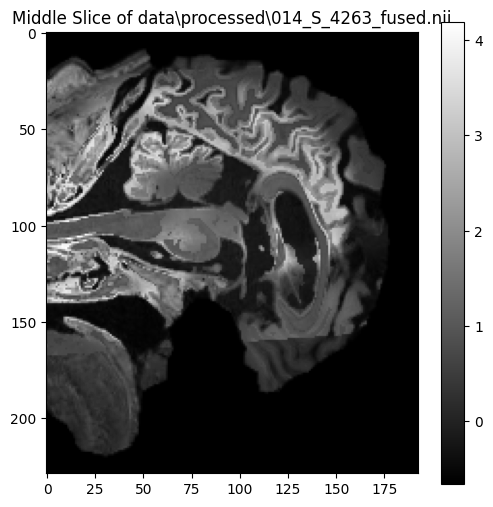

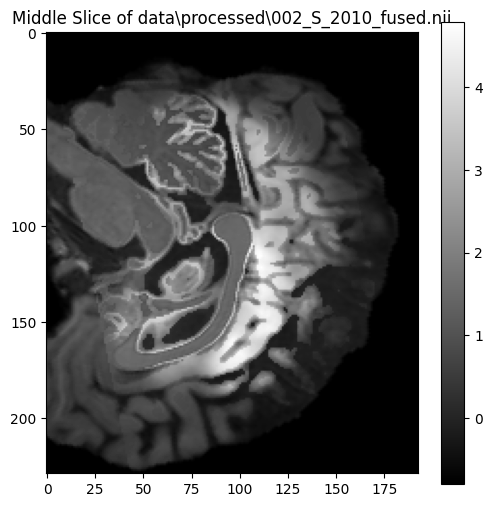

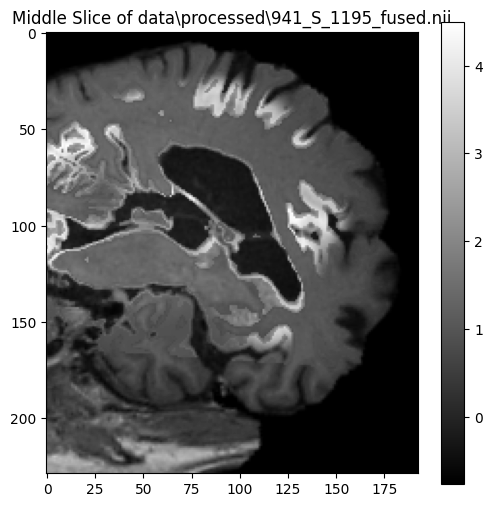

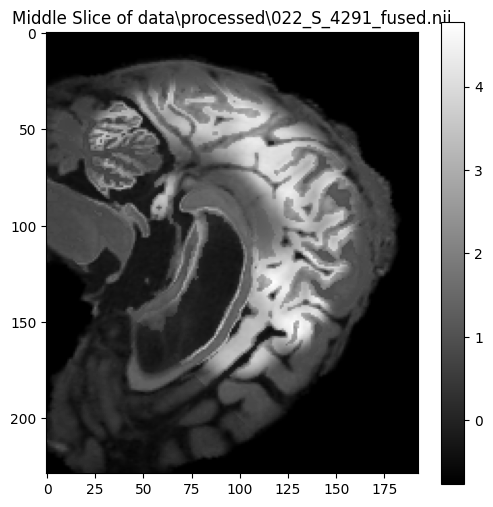

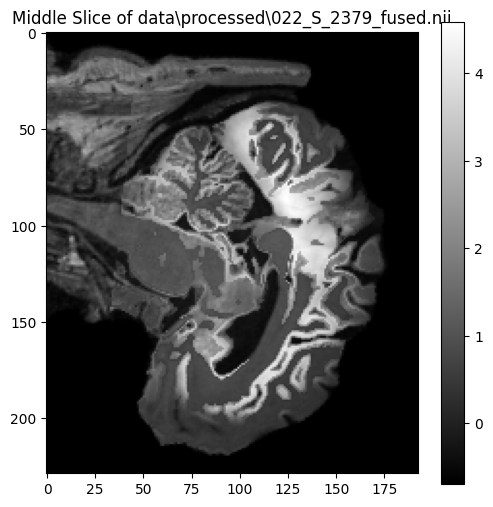

                                  Path  Mean Intensity  Standard Deviation
0  data\processed\014_S_4263_fused.nii       58.004543           88.260605
1  data\processed\002_S_2010_fused.nii   204796.109375       257271.640625
2  data\processed\941_S_1195_fused.nii       48.017735           62.977974
3  data\processed\022_S_4291_fused.nii       58.133881           76.794731
4  data\processed\022_S_2379_fused.nii       61.119289           88.495522


In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd

# Function to load and normalize images
def load_and_normalize_nii(path):
    image = nib.load(path).get_fdata()
    image = image.astype(np.float32)  # Ensure float32 type
    mean_intensity = np.mean(image)
    std_intensity = np.std(image)
    # Normalize the image
    normalized_image = (image - mean_intensity) / std_intensity
    return normalized_image, mean_intensity, std_intensity

# Sample 5 random paths from the dataset
sampled_paths = df['PATH'].sample(5, random_state=42).tolist()

# Initialize a list to store stats
image_stats = []

# Load images and compute statistics
for path in sampled_paths:
    normalized_image, mean_intensity, std_intensity = load_and_normalize_nii(path)
    image_stats.append({
        'Path': path,
        'Mean Intensity': mean_intensity,
        'Standard Deviation': std_intensity
    })
    # Optionally visualize the middle slice of the image
    plt.figure(figsize=(6, 6))
    plt.imshow(normalized_image[int(normalized_image.shape[0] / 2)], cmap='gray')
    plt.title(f"Middle Slice of {path}")
    plt.colorbar()
    plt.show()

# Convert stats to DataFrame for better visualization
stats_df = pd.DataFrame(image_stats)
print(stats_df)


In [ ]:
import numpy as np
import nibabel as nib
import pandas as pd

# Function to load and normalize images
def load_and_normalize_nii(path):
    image = nib.load(path).get_fdata()
    image = image.astype(np.float32)  # Ensure float32 type
    mean_intensity = np.mean(image)
    std_intensity = np.std(image)
    # Normalize the image
    normalized_image = (image - mean_intensity) / std_intensity
    return mean_intensity, std_intensity

# Initialize a list to store stats
image_stats = []

# Load images and compute statistics for all entries in the dataframe
for index, row in df.iterrows():
    mean_intensity, std_intensity = load_and_normalize_nii(row['PATH'])
    image_stats.append({
        'Path': row['PATH'],
        'Mean Intensity': mean_intensity,
        'Standard Deviation': std_intensity,
        'Research Group': row['Research Group']
    })

# Convert stats to DataFrame for better visualization
stats_df = pd.DataFrame(image_stats)
print(stats_df)


                                    Path  Mean Intensity  Standard Deviation  \
0    data\processed\002_S_1280_fused.nii   173515.906250       224276.250000   
1    data\processed\128_S_0863_fused.nii       88.528069           95.763336   
2    data\processed\002_S_4213_fused.nii   172701.234375       214390.328125   
3    data\processed\032_S_5289_fused.nii       65.448013           70.499512   
4    data\processed\053_S_5296_fused.nii   240411.078125       245268.515625   
..                                   ...             ...                 ...   
123  data\processed\002_S_4447_fused.nii   232930.296875       284513.312500   
124  data\processed\022_S_2167_fused.nii       54.421124           73.315582   
125  data\processed\022_S_4805_fused.nii       75.168419           97.548141   
126  data\processed\002_S_4251_fused.nii   209341.781250       264972.375000   
127  data\processed\128_S_4553_fused.nii       77.011215           96.409637   

    Research Group  
0               CN